# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

1) Extraction des données quantitatives et présenter une synthèse des données

In [12]:
#extraction des données quantitatives
X=data.iloc[:,1:7]
X

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

In [13]:
#synthèse des données quantitatives
X.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

2) Analyse ACP

In [14]:
#ACP avec 2 dimensions
x=X.values

In [15]:
#il faut centrer réduire les données, on le fait avec la bibliothèque sklearn
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [20]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full', n_components=2)
coord = acp.fit_transform(x)
coord

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

In [23]:
#Affichage des valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[2.64497357 1.70258397]


In [25]:
#Ratio de variance expliquée pour chaque composante (en pourcentages)

print(acp.explained_variance_ratio_*100)

[44.08289288 28.37639953]


On a alors conservé environ 72% de la variance du jeu de données en se limitant à 2 composantes principales

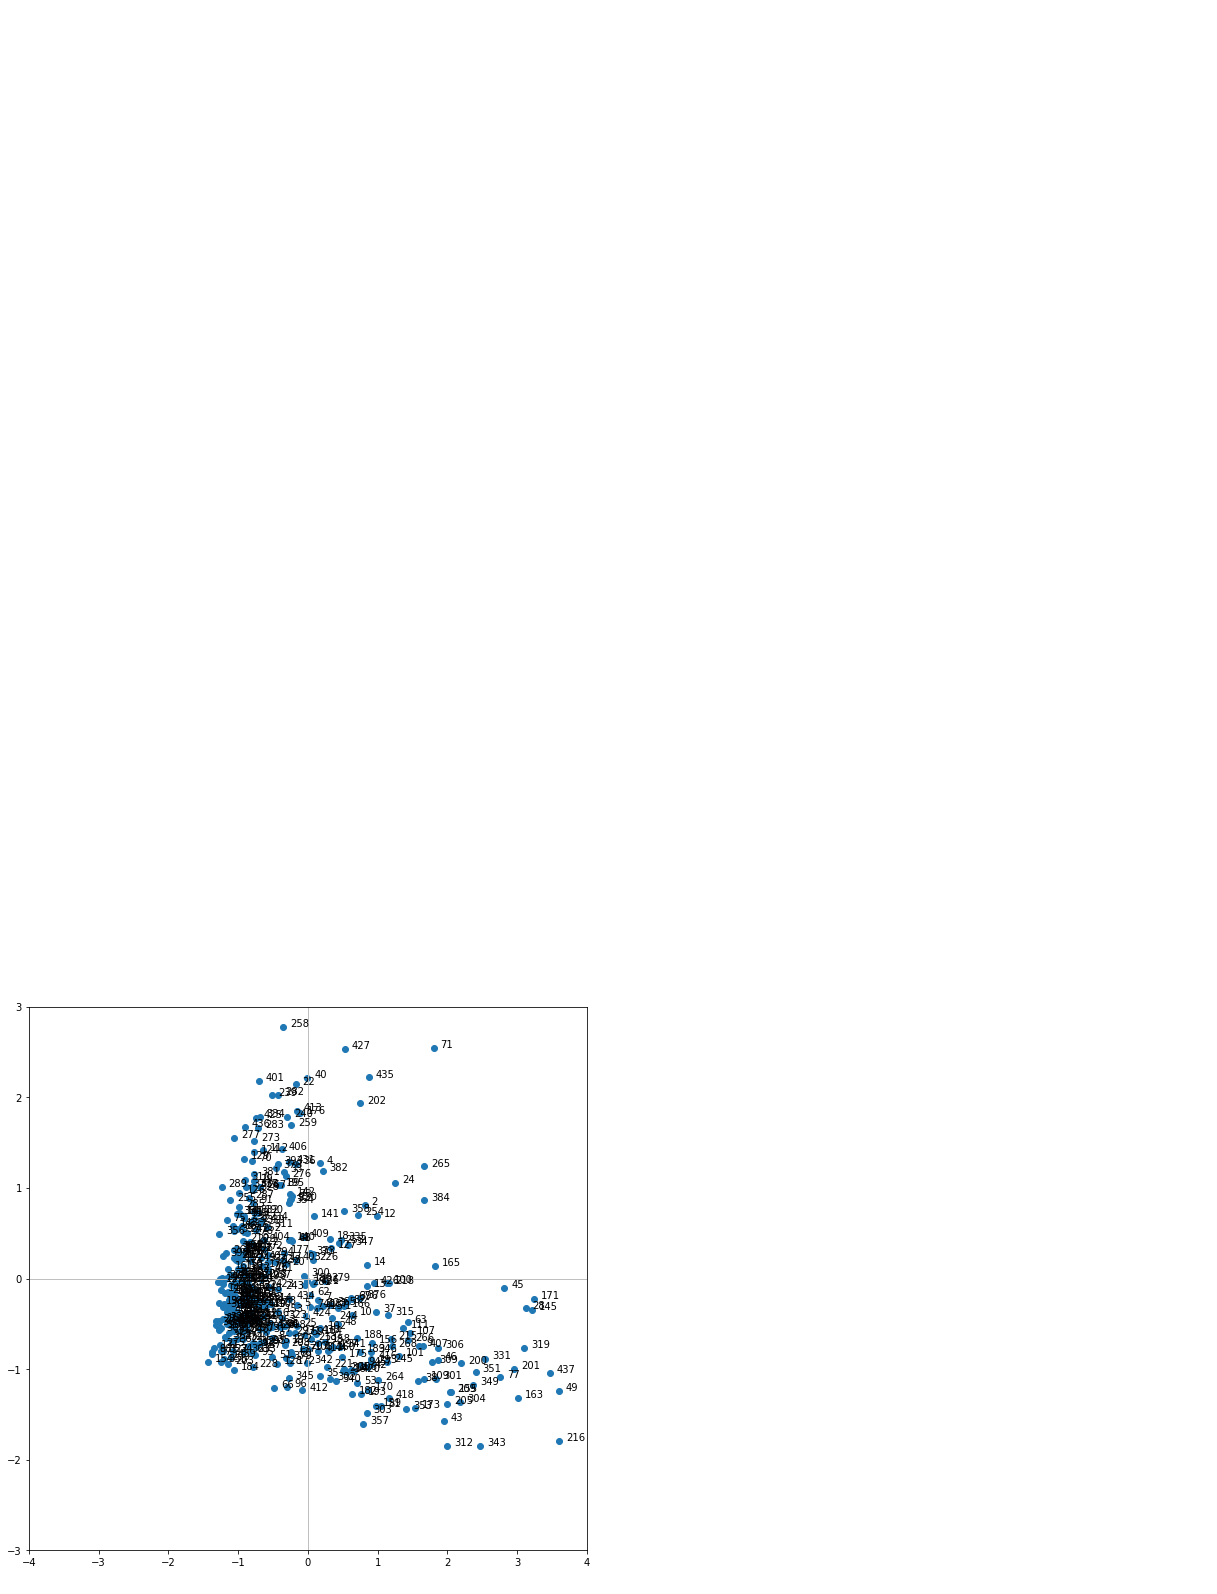

In [31]:
#affichage du graphique des individus
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(440):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

Anlayse: On voit que la très grande majorité des individus se trouvent au même endroit selon l'axe 1 donc une des variables bien représentée sur l'axe 1 a des valeurs similaires chez tous ces individus. On voit aussi que certains individus comme le 258 ont une valeur sur l'axe 2 élevée et donc il sera intéressant de voir quelles varibales oppose l'axe 2, de même pour l'axe 1.

In [43]:
#utilisation de la première métrique : valeurs propres supérieurs à 1
#il faut relancer l'acp sans réduire le nombre de composantes pour avoir toutes les dimensions
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp2 = PCA(svd_solver='full')
coord2=acp2.fit_transform(x)

variance = acp2.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval>1)



[ True  True False False False False]


On retient alors les 2 premières composantes

In [40]:
#utilisation d'une deuxième métrique : les valeurs propres supérieures à la moyenne
print(eigval>np.mean(eigval))

[ True  True False False False False]


On choisit toujours les 2 premières composantes

In [50]:
#contribution des individus à la construction des composantes 1 et 2
ctr = coord2**2
for j in range(2):
     ctr[:,j] = ctr[:,j]/(440*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.000032  0.000124
1      1  0.000162  0.000144
2      2  0.000565  0.000887
3      3  0.000521  0.000569
4      4  0.000024  0.002158
..   ...       ...       ...
435  435  0.000651  0.006584
436  436  0.000700  0.003754
437  437  0.010321  0.001443
438  438  0.000724  0.000001
439  439  0.001049  0.000990

[440 rows x 3 columns]


In [56]:
#qualité de représentation des individus sur les composantes 1 et 2
cos2 = coord2**2
di = np.sum(x**2,axis=1)
for j in range(2):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.059091  0.147225
1      1  0.332872  0.190238
2      2  0.121024  0.122206
3      3  0.472434  0.332015
4      4  0.011117  0.649903
..   ...       ...       ...
435  435  0.093651  0.609412
436  436  0.133861  0.462130
437  437  0.864131  0.077791
438  438  0.705153  0.000755
439  439  0.586514  0.356281

[440 rows x 3 columns]


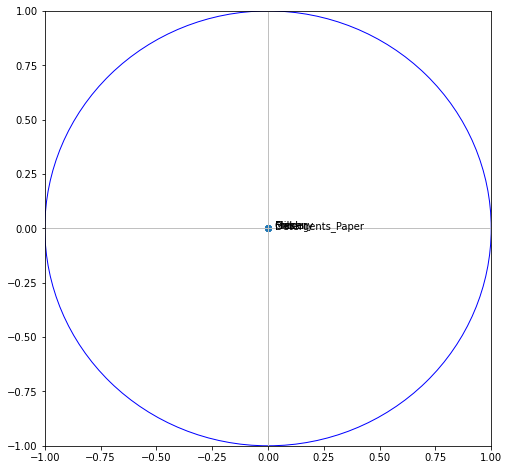

In [63]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(X.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

Il y a surement une erreur mais si ce n'est pas le cas, aucune variable n'est interprétable sur aucune des 2 composantes.

3) Classification

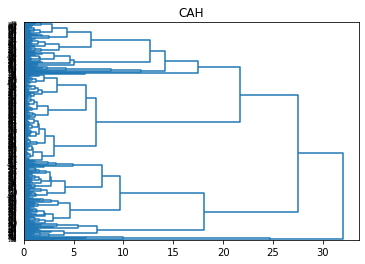

In [69]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(x,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=X.index,orientation='right',color_threshold=0)
plt.show()

Nombre de classes à retenir : on peut retenir 3 classes en coupant à une distance de 26. Si on coupe trop bas, le nombre de classes va augmenter très rapidement et elles ne seront pas forcément interprétables. En effet, on essaye ici de couper à un endroit où les branches sont assez longues (distance entre 2 groupes importante) et il est très difficile de le faire avant. De plus, l'objectif est de simplifier le jeu de données en regroupant les individus par classe dont il ne faut pas trop faire de groupes.

In [79]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 4 avec l'étude du dessus
kmeans.fit(x)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(X.index[idk],kmeans.labels_[idk]))


[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
      0
0   181
0   205
0   351
0   407
0   306
..  ...
1   147
1   158
1   439
2   325
2   183

[440 rows 

[0.6033737  0.3410612  0.34646393 0.36419766 0.3613834  0.32458445
 0.27524504 0.32752151 0.31282057 0.29814023 0.27186239 0.27029529
 0.26345155 0.25404735 0.25307272]


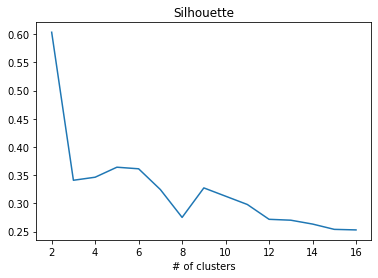

In [73]:
#métrique silhouette
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 16
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x)
    res[k] = metrics.silhouette_score(x,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

In [ ]:
La métrique silhouette montre que la qualité de parition ne change plus à partir de 3 classes, donc qu'on pourrait en choisir 3. 
Avec 5 classes, la qualité est sensiblement la même donc on peut rester comme on a fait.

In [84]:
#correspondance avec les groupes de la CAH
groupes_cah = fcluster(Z,t=26,criterion='distance')
pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0    1  2
row_0            
1       5    0  1
2      38  115  0
3       2  278  1

Analyse : on peut voir que les deux classifications sont assez différentes. En effet, la classe 1 de la méthode des k-means regroupe des individus qui se répartissement entre les classes 2 et 3 de la méthode CAH. De plus, la classe 2 de k-means ne possède qu'un individu en commun avec les classes 1 et 3 de la CAH, ce qui est particulièrement faible sur 440 individus. De même, les individus de la classe 0 en k-means sont globalement dans le classe 2 de la CAH mais 7 d'entre eux sont quand même dans d'autres classes. Globalement, on pourrait dire que la classe 0 de k-means est semblable à la classe 2 de CAH mais il est difficle de donner des "équivalences", ou tout du moins des ressemblances pour les autres classes.